In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
plt.rcParams.update({"text.usetex": False,
                     "font.size": 20,
                     "pdf.fonttype": 42,
                     "ps.fonttype": 42})

In [3]:
local_df = pd.read_csv("../measurements/local_long/map.csv")


normal_cha_df = pd.read_csv("../measurements/real_bw_test/characteristic.csv")
normal_time_df = pd.read_csv("../measurements/real_bw_test/time.csv")

jpeg_cha_df = pd.read_csv("../measurements/real_bw_test_15fps/characteristic.csv")
jpeg_time_df = pd.read_csv("../measurements/real_bw_test_15fps/time.csv")

no_jpeg_cha_df = pd.read_csv("../measurements/real_bw_no_jpeg/characteristic.csv")
no_jpeg_time_df = pd.read_csv("../measurements/real_bw_no_jpeg/time.csv")

# local_df = pd.read_csv("../measurements/local_long/map.csv")


# normal_cha_df = pd.read_csv("../measurements/real_bw_test_15fps/characteristic.csv")
# normal_time_df = pd.read_csv("../measurements/real_bw_test_15fps/time.csv")

# jpeg_cha_df = pd.read_csv("../measurements/static_test_15fps/characteristic.csv")
# jpeg_time_df = pd.read_csv("../measurements/static_test_15fps/time.csv")

# no_jpeg_cha_df = pd.read_csv("../measurements/static_test_low/characteristic.csv")
# no_jpeg_time_df = pd.read_csv("../measurements/static_test_low/time.csv")

In [4]:
cal_time = []
for i in range(len(no_jpeg_time_df)):
    if no_jpeg_time_df["technique"][i] == 2:
        cal_time.append(no_jpeg_time_df["compression_time"][i]/32)
    else:
        cal_time.append(no_jpeg_time_df["compression_time"][i])
no_jpeg_time_df["compression_time"] = cal_time

In [5]:
cal_time = []
for i in range(len(no_jpeg_time_df)):
    if no_jpeg_time_df["technique"][i] == 3:
        cal_time.append(no_jpeg_time_df["compression_time"][i]-50)
    else:
        cal_time.append(no_jpeg_time_df["compression_time"][i])
no_jpeg_time_df["compression_time"] = cal_time

cal_time = []
for i in range(len(normal_time_df)):
    if normal_time_df["technique"][i] == 3:
        cal_time.append(normal_time_df["compression_time"][i]-50)
    else:
        cal_time.append(normal_time_df["compression_time"][i])
normal_time_df["compression_time"] = cal_time

In [6]:
normal_time_df["transmission_time"] = normal_cha_df["datasize_est"]*8/normal_cha_df["consumed_bw"]*1000
normal_time_df["overall_est"] = normal_time_df["model_head_time"]*10+normal_time_df["model_tail_time"]+normal_time_df["framework_head_time"]+normal_time_df["framework_tail_time"] + normal_time_df["compression_time"]+normal_time_df["decompression_time"]+ normal_time_df["transmission_time"]

jpeg_time_df["transmission_time"] = jpeg_cha_df["datasize_est"]*8/jpeg_cha_df["consumed_bw"]*1000
jpeg_time_df["overall_est"] = jpeg_time_df["model_head_time"]*10+jpeg_time_df["model_tail_time"]+jpeg_time_df["framework_head_time"]+jpeg_time_df["framework_tail_time"] + jpeg_time_df["compression_time"]+jpeg_time_df["decompression_time"]+ jpeg_time_df["transmission_time"]

no_jpeg_time_df["transmission_time"] = no_jpeg_cha_df["datasize_est"]*8/no_jpeg_cha_df["consumed_bw"]*1000
no_jpeg_time_df["overall_est"] = no_jpeg_time_df["model_head_time"]*10+no_jpeg_time_df["model_tail_time"]+no_jpeg_time_df["framework_head_time"]+no_jpeg_time_df["framework_tail_time"] + no_jpeg_time_df["compression_time"]+no_jpeg_time_df["decompression_time"]+ no_jpeg_time_df["transmission_time"]

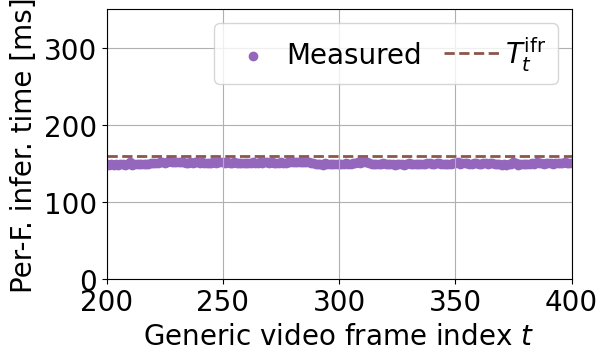

In [7]:
fig, ax1 = plt.subplots(figsize=(6, 3.5))
ax1.scatter(jpeg_time_df["frame_id"], jpeg_time_df["overall_est"], label="Measured",color="tab:purple")
ax1.hlines(y=160,xmin=200, xmax=400,color="tab:brown",linestyles="--", linewidth=2, label=r"$T^{\text{ifr}}_t$")
# ax1.scatter(normal_time_df["frame_id"], normal_time_df["overall_est"], label="Scen-2",color="tab:cyan")
# ax1.scatter(no_jpeg_time_df["frame_id"], no_jpeg_time_df["overall_est"], label="Scen-3",color="tab:olive")

# ax2 = ax1.twinx() 
# color = 'dimgray'
# ax2.set_ylabel('Avail. BW $L_t$ [Mbps]', color=color)  # we already handled the x-label with ax1
# ax2.plot(normal_cha_df["frame_id"].to_numpy(),normal_cha_df["bandwidth"]/1e6, color=color)
# ax2.tick_params(axis='y', labelcolor=color)

ax1.set_ylim([0, 350])
ax1.set_xlim([200,400])
# ax2.set_ylim([0,10])
ax1.grid()
ax1.set_ylabel("Per-F. infer. time [ms]")
ax1.set_xlabel('Generic video frame index $t$')
ax1.legend(ncol=2,loc='upper right', fontsize=20,columnspacing=0.8,handletextpad=0.2)
plt.savefig("../figures/inference_time_scen1.pdf", bbox_inches='tight')


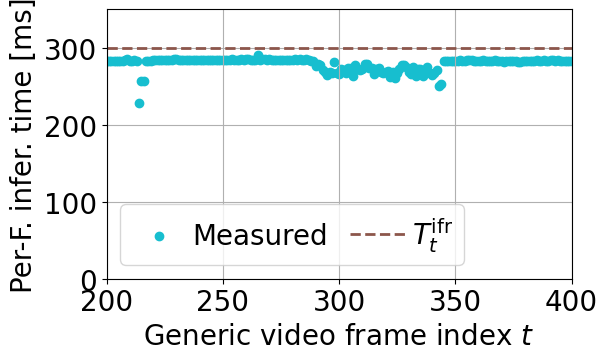

In [8]:
fig, ax1 = plt.subplots(figsize=(6, 3.5))

# ax1.scatter(jpeg_time_df["frame_id"], jpeg_time_df["overall_est"], label="Measured",color="tab:purple")
ax1.scatter(normal_time_df["frame_id"], normal_time_df["overall_est"], label="Measured",color="tab:cyan")
# ax1.scatter(no_jpeg_time_df["frame_id"], no_jpeg_time_df["overall_est"], label="Scen-3",color="tab:olive")
ax1.hlines(y=300,xmin=200, xmax=400,color="tab:brown",linestyles="--", linewidth=2, label=r"$T^{\text{ifr}}_t$")

# ax2 = ax1.twinx() 
# color = 'dimgray'
# ax2.set_ylabel('Avail. BW $L_t$ [Mbps]', color=color)  # we already handled the x-label with ax1
# ax2.plot(normal_cha_df["frame_id"].to_numpy(),normal_cha_df["bandwidth"]/1e6, color=color)
# ax2.tick_params(axis='y', labelcolor=color)

ax1.set_ylim([0, 350])
ax1.set_xlim([200,400])
# ax2.set_ylim([0,10])
ax1.grid()
ax1.set_ylabel("Per-F. infer. time [ms]")
ax1.set_xlabel('Generic video frame index $t$')
ax1.legend(ncol=2,loc='lower left', fontsize=20,columnspacing=0.8,handletextpad=0.2)
plt.savefig("../figures/inference_time_scen2.pdf", bbox_inches='tight')


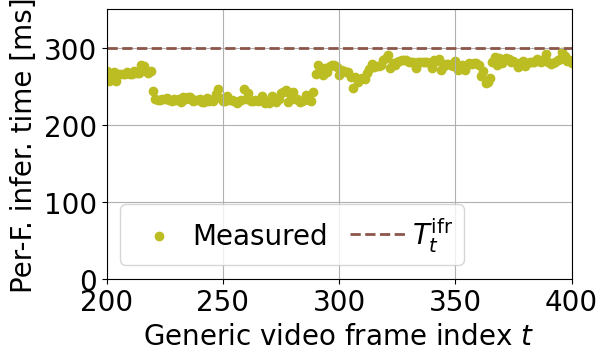

In [9]:
fig, ax1 = plt.subplots(figsize=(6, 3.5))
# ax1.scatter(jpeg_time_df["frame_id"], jpeg_time_df["overall_est"], label="Measured",color="tab:purple")
# ax1.scatter(normal_time_df["frame_id"], normal_time_df["overall_est"], label="Measured",color="tab:cyan")
ax1.scatter(no_jpeg_time_df["frame_id"], no_jpeg_time_df["overall_est"], label="Measured",color="tab:olive")
ax1.hlines(y=300,xmin=200, xmax=400,color="tab:brown",linestyles="--", linewidth=2, label=r"$T^{\text{ifr}}_t$")

# ax2 = ax1.twinx() 
# color = 'dimgray'
# ax2.set_ylabel('Avail. BW $L_t$ [Mbps]', color=color)  # we already handled the x-label with ax1
# ax2.plot(normal_cha_df["frame_id"].to_numpy(),normal_cha_df["bandwidth"]/1e6, color=color)
# ax2.tick_params(axis='y', labelcolor=color)

ax1.set_ylim([0, 350])
ax1.set_xlim([200,400])
# ax2.set_ylim([0,10])
ax1.grid()
ax1.set_ylabel("Per-F. infer. time [ms]")
ax1.set_xlabel('Generic video frame index $t$')
ax1.legend(ncol=2,loc='lower left', fontsize=20,columnspacing=0.8,handletextpad=0.2)
plt.savefig("../figures/inference_time_scen3.pdf", bbox_inches='tight')
